In [1]:
import pandas as pd
import numpy as np
from datetime import datetime

import pystan

import matplotlib.pyplot as plt

In [2]:
plt.style.context('seaborn')

In [3]:
df = pd.read_csv('weekly_in_situ_co2_mlo.csv', header=None, parse_dates=[0], dtype={1: np.float16}, names=['date', 'level_ppm'])
df.head()

,date,level_ppm
0,1958-03-29,316.25
1,1958-04-05,317.25
2,1958-04-12,317.75
3,1958-04-19,317.50
4,1958-04-26,316.50


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3210 entries, 0 to 3209
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   date       3210 non-null   datetime64[ns]
 1   level_ppm  3210 non-null   float16       
dtypes: datetime64[ns](1), float16(1)
memory usage: 31.5 KB


<AxesSubplot:xlabel='date'>

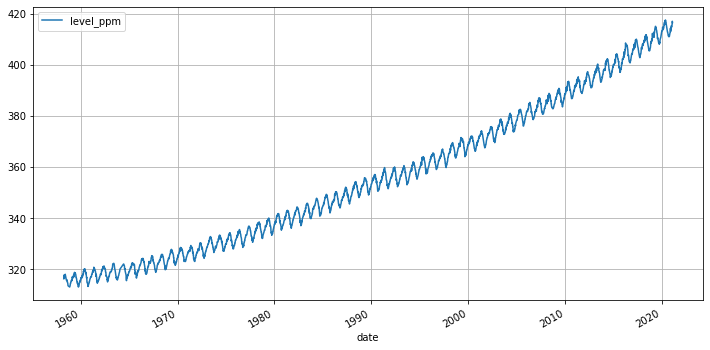

In [5]:
df.plot('date', 'level_ppm', figsize=(12, 6), grid=True)

In [6]:
df['ordinal'] = df['date'].apply(datetime.toordinal)
df.head()

,date,level_ppm,ordinal
0,1958-03-29,316.25,714867
1,1958-04-05,317.25,714874
2,1958-04-12,317.75,714881
3,1958-04-19,317.50,714888
4,1958-04-26,316.50,714895


In [7]:
bad_stan_model = pystan.StanModel(file='bad_model.stan')

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_3adea4d4a960ea17d89ff1047e35fbd1 NOW.


In [8]:
stan_data = {
    'N': len(df),
    'y': df['level_ppm'],
    'x': df['ordinal']
}
bad_results = bad_stan_model.sampling(data=stan_data)
print(bad_results)

Inference for Stan model: anon_model_3adea4d4a960ea17d89ff1047e35fbd1.
4 chains, each with iter=2000; warmup=1000; thin=1; 
post-warmup draws per chain=1000, total post-warmup draws=4000.

        mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
c0     -2812     0.2    7.7  -2826  -2817  -2812  -2807  -2796   1553    1.0
c1    4.4e-3  2.7e-7 1.1e-5 4.3e-3 4.4e-3 4.4e-3 4.4e-3 4.4e-3   1553    1.0
c2   -2.0e-3    2.01   2.84  -3.01  -2.84   0.02   2.83    3.0      2  30.19
c3     -0.09    1.11   1.57  -1.72  -1.66   -0.1   1.48   1.54      2  47.22
s        4.0  1.1e-3   0.05    3.9   3.96    4.0   4.03   4.09   1928    1.0
lp__   -6055    0.04   1.56  -6059  -6056  -6055  -6054  -6053   1427    1.0

Samples were drawn using NUTS at Thu Apr 22 02:59:25 2021.
For each parameter, n_eff is a crude measure of effective sample size,
and Rhat is the potential scale reduction factor on split chains (at 
convergence, Rhat=1).


In [9]:
c0 = bad_results['c0'][0]
c1 = bad_results['c1'][0]
c2 = bad_results['c2'][0]
c3 = bad_results['c3'][0]

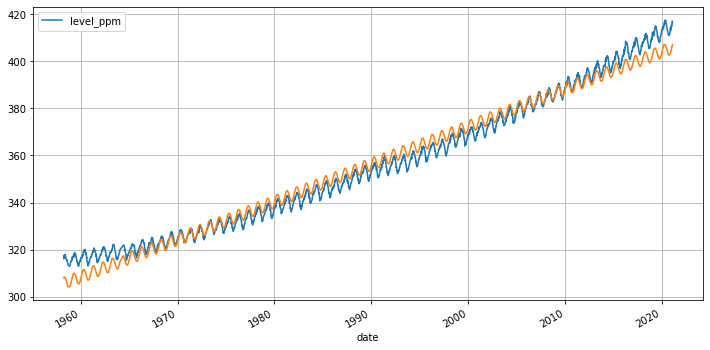

In [10]:
df.plot('date', 'level_ppm', figsize=(12, 6), grid=True)

predictions = c0 + c1* df['ordinal'] + c2 * np.cos(2 * np.pi * df['ordinal'] / 365.25 + c3)
plt.plot(df['date'], predictions)